In [1]:
# Make imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Set font settings
plt.rcParams['text.usetex'] = True
sns.set(font_scale = 1.72)

In [2]:
# Get errorless data
errorDataS = pd.read_csv("summary/SphyR-errorless.csv")
errorDataS["Method"] = "SPhyR"
errorDataD = pd.read_csv("summary/Dolphyin-errorless.csv")
errorDataD["Method"] = "Dolphyin"
errorlessData = pd.concat([errorDataD, errorDataS])
print(errorlessData)

     Unnamed: 0         mn  lossValue    Method replicate   Time Result
0             0    m25_n25        0.1  Dolphyin        s1  0.009  valid
1             1    m25_n25        0.2  Dolphyin        s1  0.009  valid
2             2    m25_n25        0.4  Dolphyin        s1  0.008  valid
3             3    m25_n25        0.1  Dolphyin        s2  0.008  valid
4             4    m25_n25        0.2  Dolphyin        s2  0.009  valid
..          ...        ...        ...       ...       ...    ...    ...
535         535  m100_n100        0.2     SPhyR       s19  0.078  valid
536         536  m100_n100        0.4     SPhyR       s19  0.069  valid
537         537  m100_n100        0.1     SPhyR       s20  0.089  valid
538         538  m100_n100        0.2     SPhyR       s20  0.103  valid
539         539  m100_n100        0.4     SPhyR       s20  0.095  valid

[1080 rows x 7 columns]


In [3]:
# Example of finding median runtimes
print("Median runtime")
print(errorlessData[(errorlessData["Method"] == "Dolphyin") & (errorlessData["mn"] == "m100_n100")]["Time"].median())

Median runtime
0.122


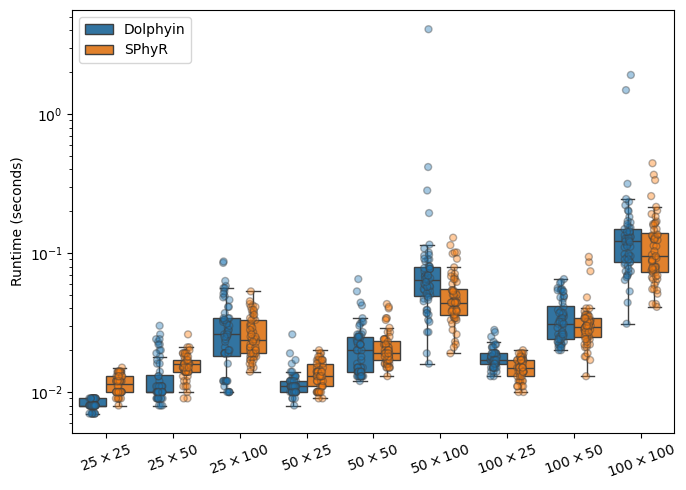

In [4]:
# Make runtime comparisons on errorless simulations
runtimeDims = (7, 5)
fig, ax = plt.subplots(figsize = runtimeDims)
line = sns.stripplot(data = errorlessData, x = "mn", y = "Time", hue = "Method", alpha = 0.4, linewidth = 1, jitter = 0.1, dodge = True)
ax.get_legend().remove()
sns.boxplot(data = errorlessData, x = "mn", y = "Time", hue = "Method", showfliers = False)

# Polish figure
ax.set_yscale("log")
ax.set_xlabel('')
ax.set_ylabel('Runtime (seconds)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:4], labels[2:4], title="", loc = 'upper left')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], [r"$25\times25$", r"$25\times50$", r"$25\times100$", 
                                         r"$50\times25$", r"$50\times50$", r"$50\times100$", 
                                         r"$100\times25$", r"$100\times50$", r"$100\times100$"],
          rotation=20)
plt.tight_layout()
plt.show()
# plt.savefig("runtimes-errorless.perrorData")

In [5]:
# Examine datasets with error
errorData = pd.read_csv("summary/Dolphyin-error.csv")
print(errorData)

      Unnamed: 0        mn  lossValue    Method dataset-replicate  \
0              0   m25_n25        0.1  Dolphyin                s1   
1              1   m25_n25        0.1  Dolphyin                s1   
2              2   m25_n25        0.1  Dolphyin                s1   
3              3   m25_n25        0.1  Dolphyin                s1   
4              4   m25_n25        0.1  Dolphyin                s1   
...          ...       ...        ...       ...               ...   
1795        1795  m100_n25        0.4  Dolphyin               s20   
1796        1796  m100_n25        0.4  Dolphyin               s20   
1797        1797  m100_n25        0.4  Dolphyin               s20   
1798        1798  m100_n25        0.4  Dolphyin               s20   
1799        1799  m100_n25        0.4  Dolphyin               s20   

      Dolphyin-replicate   Time    FNRate  
0                      0  0.011  0.000000  
1                      1  0.011  0.000000  
2                      2  0.011  0.0000

In [6]:
# Get data over limited restart counts and filter to cases with output solution (error corr. is probabilistic) 
errorData = errorData[errorData["FNRate"] >= 0]
errorDataFil1 = errorData[errorData["Dolphyin-replicate"] <= 0]
errorDataFil5 = errorData[errorData["Dolphyin-replicate"] <= 4]
errorDataFil10 = errorData[errorData["Dolphyin-replicate"] <= 9]
errorDataFil1 = errorDataFil1.loc[errorDataFil1.groupby(["lossValue", "mn", "dataset-replicate"])["FNRate"].idxmin()].drop(["Dolphyin-replicate"], axis = 1)
errorDataFil5 = errorDataFil5.loc[errorDataFil5.groupby(["lossValue", "mn", "dataset-replicate"])["FNRate"].idxmin()].drop(["Dolphyin-replicate"], axis = 1)
errorDataFil10 = errorDataFil10.loc[errorDataFil10.groupby(["lossValue", "mn", "dataset-replicate"])["FNRate"].idxmin()].drop(["Dolphyin-replicate"], axis = 1)
errorDataFil1["rep-count"] = "1 Restart"
errorDataFil5["rep-count"] = "5 Restarts"
errorDataFil10["rep-count"] = "10 Restarts"
errorDataTotal = pd.concat([errorDataFil1, errorDataFil5, errorDataFil10], ignore_index = True)

# Re-order data for figure
restartOrder = ["1 Restart", "5 Restarts", "10 Restarts"]
errorDataTotal["rep-count"] = pd.Categorical(errorDataTotal["rep-count"], categories = restartOrder, ordered = True)
errorDataTotal = errorDataTotal.sort_values(by = "rep-count")

mNorder = ["m25_n25", "m50_n25", "m100_n25"]
errorDataTotal["mn"] = pd.Categorical(errorDataTotal["mn"], categories = mNorder, ordered = True)
errorDataTotal = errorDataTotal.sort_values(by = "mn")

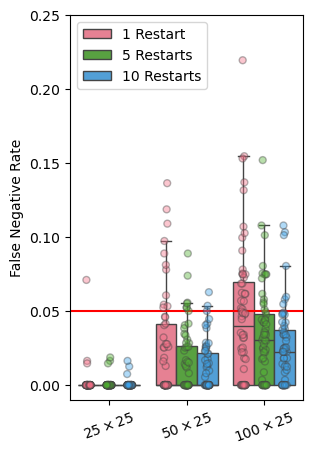

In [7]:
# Make figure over restarts on error data
runtimeDims = (3, 5)
fig, ax = plt.subplots(figsize = runtimeDims)
line = sns.stripplot(errorDataTotal, x = "mn", y = "FNRate", hue = "rep-count", alpha = 0.4, linewidth = 1, jitter = 0.1, dodge = True, palette = "husl")
sns.boxplot(errorDataTotal, x = "mn", y = "FNRate", hue = "rep-count", showfliers = False, palette = "husl")
ax.set_xlabel('')
ax.set_ylim(-0.01, 0.25)
ax.set_ylabel('False Negative Rate')

# Polish figure
ax.axhline(y = 0.05, color = "red")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:6], labels[3:6], title="", loc = 'upper left')
plt.xticks([0, 1, 2], [r"$25\times25$", r"$50\times25$", r"$100\times25$"], rotation = 20)
plt.show()
# plt.savefig("FNRate-error.pdf", bbox_inches = 'tight')